In [1]:
# Install libraries
# %conda install matplotlib-inline
# %conda install pandas
# %conda install numpy
# %conda install scikit-learn
# %conda install scipy
# %conda install matplotlib
# %conda install seaborn
# %conda install tqdm
# %pip install torch torchvision

In [2]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [3]:
# create synthetic data

N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) / 2

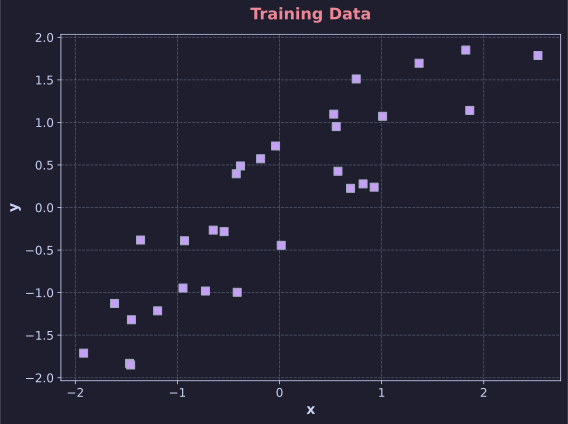

In [4]:
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(8, 6), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

ax.plot(
    x,
    y,
    "s",
    color="#C6A0F6",
    markersize=8,
    markeredgecolor="#a6adc8",
    markeredgewidth=1,
)
ax.set_xlabel("x", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_ylabel("y", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_title("Training Data", fontsize=16, color="#ed8796", fontweight="bold", pad=15)
ax.grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax.set_facecolor("#1e1e2e")
ax.tick_params(colors="#cad3f5", labelsize=12)

# Style spines
for spine in ax.spines.values():
    spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()

In [5]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1),  # hidden layer (1 input, 1 output)
    nn.ReLU(),  # activation function
    nn.Linear(1, 1),  # output layer (1 input, 1 output)
)
# Notice that we express linear operations in a separate call than the activation function despite being in the same layer.
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [6]:
# Common methods associated with nn.Module

# .train(): Puts the model in training mode
# .eval(): Puts the model in evaluation mode
# .requires_grad_(True/False): Turns on/off gradient tracking
# .zero_grad(): Clears the gradients of all parameters
# .backward(): Computes the gradient of the loss with respect to the parameters
# .step(): Updates the parameters of the model
# .state_dict(): Returns a dictionary containing the model's parameters
# .parameters(): Returns an iterator over the model's parameters

In [7]:
# learning rate
learningRate = 0.05

# loss function
lossfun = nn.MSELoss()  # Mean Squared Error Loss

# optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(
    ANNreg.parameters(),  # Which parameters to optimize
    lr=learningRate,  # Learning rate
)

# What's the difference between gradient descent and stochastic gradient descent?


**Gradient descent**, in its purest form, also known as **batch gradient descent**, calculates the error for all the training examples before making a single update to the model's parameters. This means it computes the average gradient across the entire dataset to take one step towards the minimum of the cost function.

**Stochastic gradient descent**, on the other hand, takes a more granular approach. It updates the model's parameters for each training example it processes. Instead of averaging the gradients of all examples, it takes a "stochastic" or random sample of one example at a time to guide its descent.


### The Impact of Batch Size

The distinction between these two methods can be further understood by the concept of **batch size**, which is the number of training examples utilized in one iteration.

* **Gradient Descent:** The batch size is equal to the total number of training examples.
* **Stochastic Gradient Descent:** The batch size is one.

### The "Noisy" Advantage of SGD

A key characteristic of SGD is its "noisy" updates. Because it's learning from one example at a time, the path it takes towards the minimum can be erratic and jumpy. While this might seem like a disadvantage, it can actually be beneficial. This randomness can help the algorithm escape from shallow **local minima** in the cost function, which are points that appear to be a minimum but aren't the true lowest point (the **global minimum**). Batch gradient descent, with its smooth and direct path, is more susceptible to getting stuck in these local minima.



### Which One Should You Choose?

* **Mini-Batch Gradient Descent:** This is a popular hybrid approach where the batch size is greater than one but less than the total number of training examples. It strikes a balance between the computational efficiency of SGD and the stable convergence of batch gradient descent.
In practice, **mini-batch gradient descent** is the most commonly used variant as it combines the best of both worlds, offering a good balance between computational speed and convergence stability.

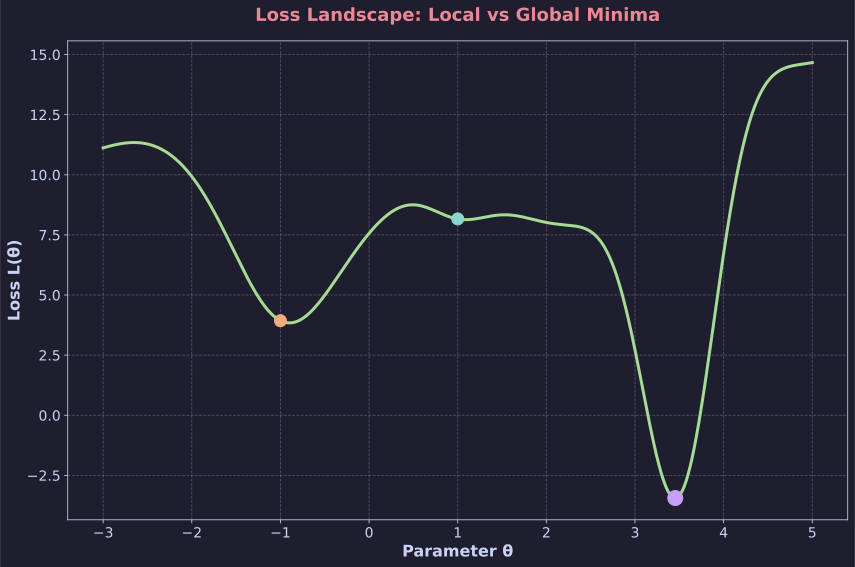

In [8]:
# Loss Landscape Visualization: Local vs Global Minima
# This shows a mathematical function with multiple minima


def create_loss_landscape():
    """
    Creates a visualization of a loss function with local and global minima
    to illustrate the concept of optimization landscapes
    """

    # Set up Catppuccin Macchiato color scheme
    colors = {
        "text": "#cad3f5",
        "title": "#ed8796",
        "function": "#a6da95",
        "global_min": "#C6A0F6",
        "local_min1": "#f5a97f",
        "local_min2": "#8bd5ca",
        "grid": "#cad3f5",
    }

    # Create parameter range
    theta = np.linspace(-3, 5, 1000)

    # Define a loss function with multiple minima
    # Global minimum around -5, with several local minima at higher values
    loss = (
        # Main global minimum (deep valley at theta=3.5)
        2 * np.exp(-3 * (theta - 3.5) ** 2) * (-8)
        +
        # Local minimum (at theta=-1)
        1.5 * np.exp(-2 * (theta + 1) ** 2) * (-2)
        +
        # Another local minimum (at theta=1)
        1 * np.exp(-4 * (theta - 1) ** 2) * (-1.5)
        +
        # Base function to create hills and valleys
        0.3 * theta**2
        + 1.5 * np.sin(2 * theta)
        + 8
    )

    # Find critical points
    global_min_idx = np.argmin(loss)
    global_min_theta = theta[global_min_idx]
    global_min_loss = loss[global_min_idx]

    # Create the plot with dark background
    plt.style.use("dark_background")
    fig, ax = plt.subplots(figsize=(12, 8), facecolor="#1e1e2e")
    fig.patch.set_facecolor("#1e1e2e")

    # Plot the loss function
    ax.plot(
        theta, loss, color=colors["function"], linewidth=3, label="Loss Function L(θ)"
    )

    # Mark the global minimum
    ax.plot(
        global_min_theta,
        global_min_loss,
        "o",
        color=colors["global_min"],
        markersize=15,
        label=f"Global Minimum\nθ* = {global_min_theta:.2f}\nL(θ*) = {global_min_loss:.1f}",
    )

    # Mark local minima
    local_minima_positions = [-1.0, 1.0]
    local_minima_colors = [colors["local_min1"], colors["local_min2"]]

    for i, lm_theta in enumerate(local_minima_positions):
        lm_idx = np.argmin(np.abs(theta - lm_theta))
        lm_loss = loss[lm_idx]
        ax.plot(
            lm_theta,
            lm_loss,
            "o",
            color=local_minima_colors[i],
            markersize=12,
            label=f"Local Minimum {i+1}\nθ = {lm_theta:.1f}\nL(θ) = {lm_loss:.1f}",
        )

    # Styling to match your theme
    ax.set_xlabel("Parameter θ", fontsize=16, color=colors["text"], fontweight="bold")
    ax.set_ylabel("Loss L(θ)", fontsize=16, color=colors["text"], fontweight="bold")
    ax.set_title(
        "Loss Landscape: Local vs Global Minima",
        fontsize=18,
        color=colors["title"],
        fontweight="bold",
        pad=20,
    )
    ax.grid(True, alpha=0.3, color=colors["grid"], linestyle="--")
    ax.legend(fontsize=12, framealpha=0.9, facecolor="#181825")
    ax.set_facecolor("#1e1e2e")
    ax.tick_params(colors=colors["text"], labelsize=14)

    # Remove the legend
    ax.legend().remove()

    # Style spines
    for spine in ax.spines.values():
        spine.set_color(colors["text"])

    plt.tight_layout()
    plt.show()


# Run the visualization
create_loss_landscape()

# Additional explorations

In [9]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)  # Initialize losses vector


## Train the model!
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()  # Clear old gradients
    loss.backward()  # Calculate new gradients via backprop
    optimizer.step()  # Update the parameters using gradients

In [10]:
# final forward pass throught the trained model
predictions = ANNreg(x)

# Test loss of the trained model (MSE)
testloss = (predictions - y).pow(2).mean()

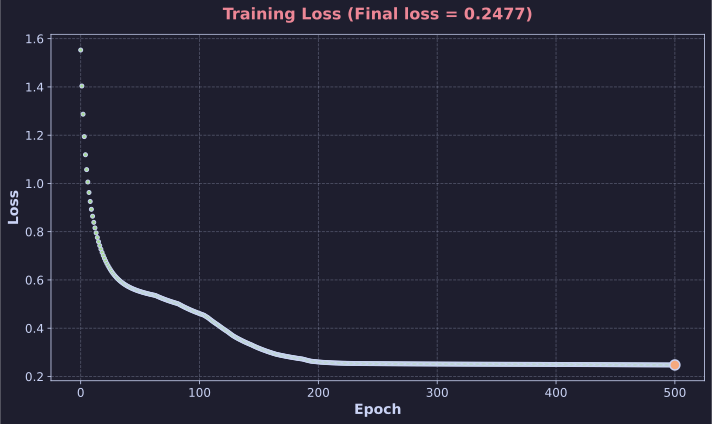

In [11]:
# plot the losses over epochs
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 6), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

ax.plot(
    losses.detach(),
    "o",
    color="#a6da95",
    markerfacecolor="#a6da95",
    markeredgecolor="#cad3f5",
    linewidth=0.5,
    markersize=4,
)
ax.plot(
    numepochs,
    testloss.detach(),
    "o",
    color="#f5a97f",
    markersize=10,
    markeredgecolor="#cad3f5",
    markeredgewidth=1.5,
)


ax.set_xlabel("Epoch", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_ylabel("Loss", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_title(
    f"Training Loss (Final loss = {testloss.item():.4f})",
    fontsize=16,
    color="#ed8796",
    fontweight="bold",
    pad=15,
)
ax.grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax.set_facecolor("#1e1e2e")
ax.tick_params(colors="#cad3f5", labelsize=12)

# Style spines
for spine in ax.spines.values():
    spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()

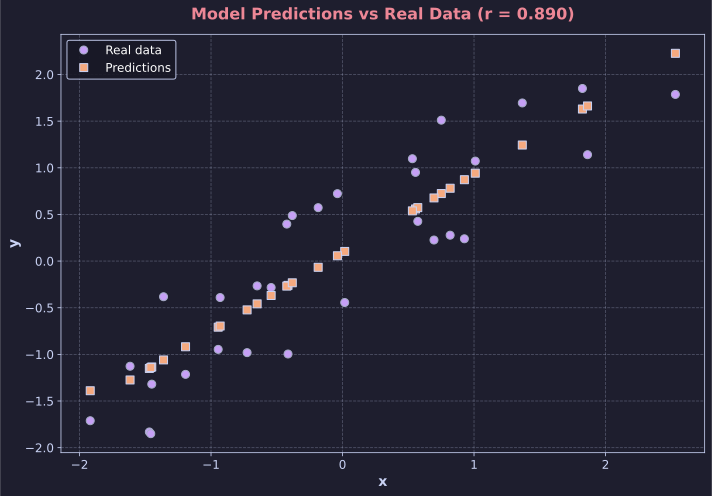

In [12]:
# Plot predictions vs real data with Catppuccin Macchiato styling
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 7), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

# Calculate correlation
correlation = np.corrcoef(y.T, predictions.detach().T)[0, 1]

ax.plot(
    x,
    y,
    "o",
    color="#C6A0F6",
    markersize=8,
    markeredgecolor="#a6adc8",
    markeredgewidth=1,
    label="Real data",
)
ax.plot(
    x,
    predictions.detach(),
    "s",
    color="#f5a97f",
    markersize=8,
    markeredgecolor="#cad3f5",
    markeredgewidth=1,
    label="Predictions",
)

ax.set_xlabel("x", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_ylabel("y", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_title(
    f"Model Predictions vs Real Data (r = {correlation:.3f})",
    fontsize=16,
    color="#ed8796",
    fontweight="bold",
    pad=15,
)
ax.grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax.legend(fontsize=12, framealpha=0.9, facecolor="#181825", edgecolor="#cad3f5")
ax.set_facecolor("#1e1e2e")
ax.tick_params(colors="#cad3f5", labelsize=12)

# Style spines
for spine in ax.spines.values():
    spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()

### We randomly selected N of 30 data points but can we more systematically answer how much data is enough ?  


In [13]:
# Let's create two functions, one to create the data and one to build and train the model.


def createTheData(N):
    x = torch.randn(N, 1)
    y = x + torch.randn(N, 1) / 5
    return x, y


def buildAndTrainTheModel(x, y):

    # build the model
    ANNreg = nn.Sequential(
        nn.Linear(1, 1),  # input layer
        nn.LeakyReLU(),  # activation function
        nn.Linear(1, 1),  # output layer
    )

    # loss and optimizer functions
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(), lr=0.05)

    #### train the model
    numepochs = 500
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat, y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # end training loop

    ### compute model predictions
    predictions = ANNreg(x)

    # output:
    return predictions, losses

In [14]:
# Now we run the function over a range of N values and save the losses

N_values = []
test_losses = []

for n in range(5, 500, 5):
    x, y = createTheData(n)
    predictions, losses = buildAndTrainTheModel(x, y)
    testloss = (predictions - y).pow(2).mean()
    N_values.append(n)
    test_losses.append(testloss.item())

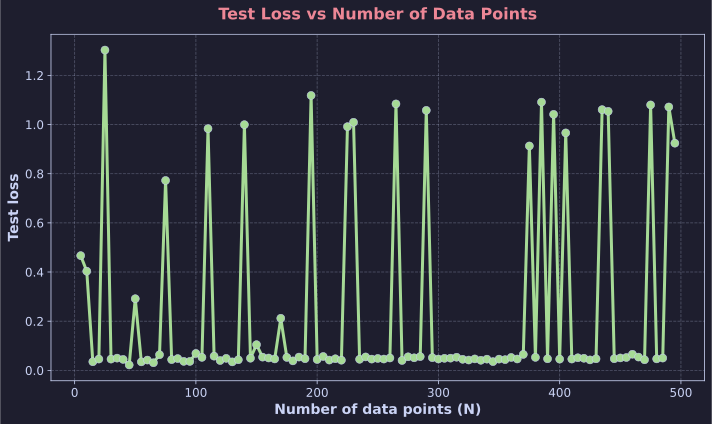

In [15]:
# Plot the losses over N

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 6), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

ax.plot(
    N_values,
    test_losses,
    "o-",
    color="#a6da95",
    linewidth=3,
    markersize=8,
    markeredgecolor="#cad3f5",
    markeredgewidth=0.5,
)
ax.set_xlabel(
    "Number of data points (N)", fontsize=14, color="#cad3f5", fontweight="bold"
)
ax.set_ylabel("Test loss", fontsize=14, color="#cad3f5", fontweight="bold")
ax.set_title(
    "Test Loss vs Number of Data Points",
    fontsize=16,
    color="#ed8796",
    fontweight="bold",
    pad=15,
)
ax.grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax.set_facecolor("#1e1e2e")
ax.tick_params(colors="#cad3f5", labelsize=12)

# Style spines
for spine in ax.spines.values():
    spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()

In [16]:
### Let's try a a different y equation, there's a point to make here I promise.


def createTheData(m):
    N = 20
    x = torch.randn(N, 1)
    y = m * x + torch.randn(N, 1) / 2
    return x, y

In [17]:
# Try the model over a range of m values


# the slopes to simulate
slopes = np.linspace(-2, 2, 21)

numExps = 50

# initialize output matrix
results = np.zeros((len(slopes), numExps, 2))

for slope_idx in range(len(slopes)):

    for N in range(numExps):

        # create a dataset and run the model
        x, y = createTheData(slopes[slope_idx])
        predictions, losses = buildAndTrainTheModel(x, y)
        yHat = predictions.detach()

        # store the final loss and performance
        results[slope_idx, N, 0] = losses[-1]
        results[slope_idx, N, 1] = np.corrcoef(y.T, yHat.T)[0, 1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/var/folders/hs/f4wh7tks687bhbzwt29vg79h0000gn/T/ipykernel_39932/782240128.py:22: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  results[slope_idx, N, 0] = losses[-1]


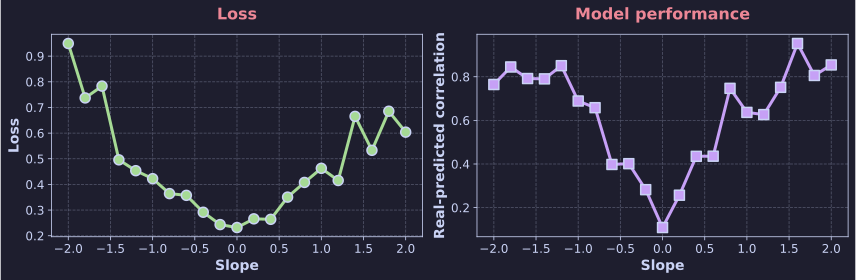

In [18]:
# plot the results!

plt.style.use("dark_background")
fig, ax = plt.subplots(1, 2, figsize=(12, 4), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

# Left subplot - Loss
ax[0].plot(
    slopes,
    np.mean(results[:, :, 0], axis=1),
    "o-",
    color="#a6da95",
    markerfacecolor="#a6da95",
    markeredgecolor="#cad3f5",
    markeredgewidth=1.5,
    markersize=10,
    linewidth=3,
)
ax[0].set_xlabel("Slope", fontsize=14, color="#cad3f5", fontweight="bold")
ax[0].set_ylabel("Loss", fontsize=14, color="#cad3f5", fontweight="bold")
ax[0].set_title("Loss", fontsize=16, color="#ed8796", fontweight="bold", pad=15)
ax[0].grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax[0].set_facecolor("#1e1e2e")
ax[0].tick_params(colors="#cad3f5", labelsize=12)

# Right subplot - Model performance
ax[1].plot(
    slopes,
    np.mean(results[:, :, 1], axis=1),
    "s-",
    color="#C6A0F6",
    markerfacecolor="#C6A0F6",
    markeredgecolor="#cad3f5",
    markeredgewidth=1.5,
    markersize=10,
    linewidth=3,
)
ax[1].set_xlabel("Slope", fontsize=14, color="#cad3f5", fontweight="bold")
ax[1].set_ylabel(
    "Real-predicted correlation", fontsize=14, color="#cad3f5", fontweight="bold"
)
ax[1].set_title(
    "Model performance", fontsize=16, color="#ed8796", fontweight="bold", pad=15
)
ax[1].grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax[1].set_facecolor("#1e1e2e")
ax[1].tick_params(colors="#cad3f5", labelsize=12)

# Style spines for both subplots
for axis in ax:
    for spine in axis.spines.values():
        spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()

## Now let's move on to classification problems

### Import and process the iris data

In [19]:
# import dataset (comes with seaborn)
import seaborn as sns

iris = sns.load_dataset("iris")


iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


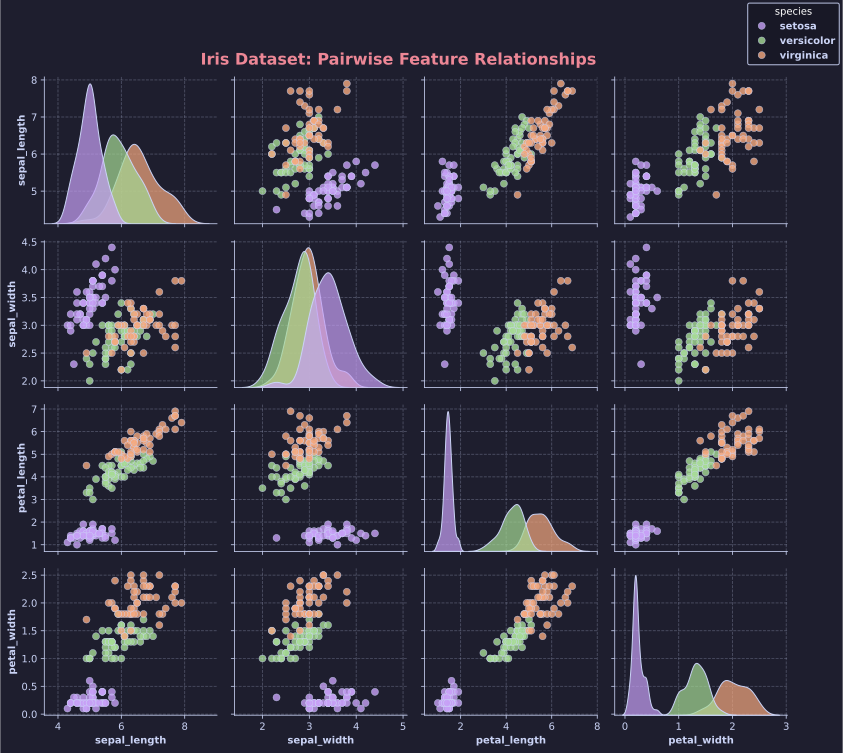

In [20]:
# some plots to show the data with Catppuccin Macchiato styling
plt.style.use("dark_background")

# Create the pairplot with custom styling
g = sns.pairplot(
    iris,
    hue="species",
    palette=["#C6A0F6", "#a6da95", "#f5a97f"],  # Catppuccin colors for species
    plot_kws={
        "alpha": 0.8,
        "s": 50,  # marker size
        "edgecolors": "#cad3f5",
        "linewidth": 0.5,
    },
    diag_kws={"alpha": 0.7, "edgecolor": "#cad3f5"},
)

# Style the figure
g.figure.patch.set_facecolor("#1e1e2e")

# Style each subplot
for i in range(len(g.axes)):
    for j in range(len(g.axes[i])):
        ax = g.axes[i, j]
        ax.set_facecolor("#1e1e2e")
        ax.grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
        ax.tick_params(colors="#cad3f5", labelsize=10)

        # Style spines
        for spine in ax.spines.values():
            spine.set_color("#cad3f5")

        # Style labels
        if ax.get_xlabel():
            ax.set_xlabel(ax.get_xlabel(), color="#cad3f5", fontweight="bold")
        if ax.get_ylabel():
            ax.set_ylabel(ax.get_ylabel(), color="#cad3f5", fontweight="bold")

# Style the legend and move it outside
legend = g._legend
if legend:
    legend.set_frame_on(True)
    legend.get_frame().set_facecolor("#181825")
    legend.get_frame().set_edgecolor("#cad3f5")
    legend.get_frame().set_alpha(0.9)
    for text in legend.get_texts():
        text.set_color("#cad3f5")
        text.set_fontweight("bold")

    # Move legend outside the plot area
    legend.set_bbox_to_anchor((1.05, 1))

# Add a main title
g.figure.suptitle(
    "Iris Dataset: Pairwise Feature Relationships",
    fontsize=16,
    color="#ed8796",
    fontweight="bold",
    y=0.98,
)

plt.tight_layout()
plt.show()

In [21]:
# organize the data

# convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Create the ANN model

In [22]:
# model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 64),  # input layer
    nn.ReLU(),  # activation
    nn.Linear(64, 64),  # hidden layer
    nn.ReLU(),  # activation
    nn.Linear(64, 3),  # output layer
)

# loss function
lossfun = (
    nn.CrossEntropyLoss()
)  # This method performs a Logsoftmax on the output and then computes the cross-entropy loss.

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

Cross-entropy loss is a metric used to measure the performance of a classification model whose output is a probability value between 0 and 1.

It is the most common loss function for classification problems.

***

### The Core Idea: Measuring "Surprise" 🤔

At its heart, cross-entropy measures the "surprise" the model feels when it sees the actual outcome. The goal is to train a model that is not surprised by the truth.

* **Low Loss (Low Surprise)**: If the model predicts a high probability for the correct class (e.g., predicts 95% "cat" and the image is a cat), the surprise is low, and therefore the loss is low.
* **High Loss (High Surprise)**: If the model predicts a low probability for the correct class (e.g., predicts 5% "cat" and the image is a cat), the surprise is high. The loss is also high, heavily penalizing the model for being confidently wrong.

This penalty for confident mistakes is what makes cross-entropy so effective. The logarithm in its formula means that as the predicted probability for the correct answer gets closer to 0, the loss approaches infinity.



***

### How It Works in Practice

Cross-entropy comes in two main flavors depending on the type of classification task.

#### 1. Binary Cross-Entropy

* **When to use it**: For **two-class** classification problems (e.g., spam or not spam, cat or dog).
* **How it works**: The model outputs a single probability value for the positive class (usually via a `Sigmoid` activation function). The loss function then considers two scenarios:
    * If the true label is 1, it calculates `-log(predicted_probability)`.
    * If the true label is 0, it calculates `-log(1 - predicted_probability)`.
* **In PyTorch**: `nn.BCELoss()` or `nn.BCEWithLogitsLoss()` (which is more numerically stable and recommended).

#### 2. Categorical Cross-Entropy

* **When to use it**: For **multi-class** classification problems where each sample belongs to only one class (e.g., classifying images of digits 0-9).
* **How it works**: The model outputs a probability distribution across all classes (usually via a `Softmax` activation function). The loss calculation then simplifies to just looking at the predicted probability for the **one true class**.
    * The formula is simply: `-log(probability_of_the_correct_class)`.
* **In PyTorch**: `nn.CrossEntropyLoss()` (which conveniently includes the Softmax activation within its calculation).

### Train the model

In [23]:
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
accuracies = []

# loop over epochs
for epochi in range(numepochs):

    # forward pass
    predictions = ANNiris(data)

    # compute loss
    loss = lossfun(predictions, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy (For every epoch)
    matches = torch.argmax(predictions, axis=1) == labels  # booleans (false/true)
    # argmax returns the index of the maximum value in each row of yHat
    # so if the predicted label is the same as the true label, the match is true
    matchesNumeric = matches.float()  # convert to numbers (0/1)
    accuracyPct = 100 * torch.mean(matchesNumeric)  # average and x100
    accuracies.append(accuracyPct)  # add to list of accuracies


# final forward pass
predictions = ANNiris(data)

predlabels = torch.argmax(predictions, axis=1)
totalacc = 100 * torch.mean((predlabels == labels).float())

In [24]:
torch.argmax(predictions, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Visualize the results

Final accuracy: 98%


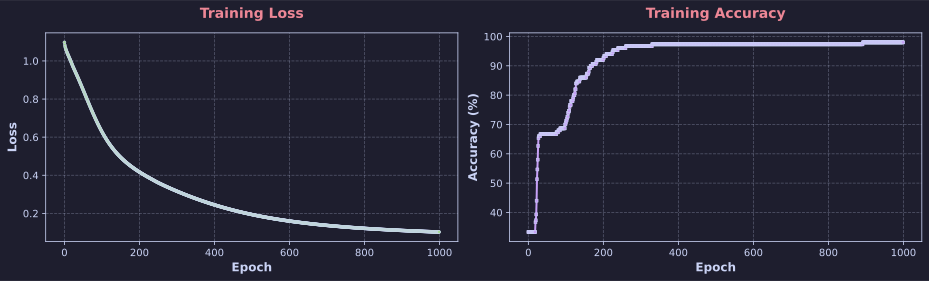

In [25]:
# report accuracy
print("Final accuracy: %g%%" % totalacc)

# Apply Catppuccin Macchiato styling
plt.style.use("dark_background")
fig, ax = plt.subplots(1, 2, figsize=(13, 4), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

# Loss plot
ax[0].plot(
    losses.detach(),
    color="#a6da95",
    linewidth=2,
    marker="o",
    markersize=3,
    markeredgecolor="#cad3f5",
    markeredgewidth=0.5,
)
ax[0].set_ylabel("Loss", fontsize=12, color="#cad3f5", fontweight="bold")
ax[0].set_xlabel("Epoch", fontsize=12, color="#cad3f5", fontweight="bold")
ax[0].set_title(
    "Training Loss", fontsize=14, color="#ed8796", fontweight="bold", pad=15
)
ax[0].grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax[0].set_facecolor("#1e1e2e")
ax[0].tick_params(colors="#cad3f5", labelsize=10)

# Accuracy plot
ax[1].plot(
    accuracies,
    color="#C6A0F6",
    linewidth=2,
    marker="s",
    markersize=3,
    markeredgecolor="#cad3f5",
    markeredgewidth=0.5,
)
ax[1].set_ylabel("Accuracy (%)", fontsize=12, color="#cad3f5", fontweight="bold")
ax[1].set_xlabel("Epoch", fontsize=12, color="#cad3f5", fontweight="bold")
ax[1].set_title(
    "Training Accuracy", fontsize=14, color="#ed8796", fontweight="bold", pad=15
)
ax[1].grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
ax[1].set_facecolor("#1e1e2e")
ax[1].tick_params(colors="#cad3f5", labelsize=10)

# Style spines for both subplots
for axis in ax:
    for spine in axis.spines.values():
        spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()
# run training again to see whether this performance is consistent

In [26]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(predictions), axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

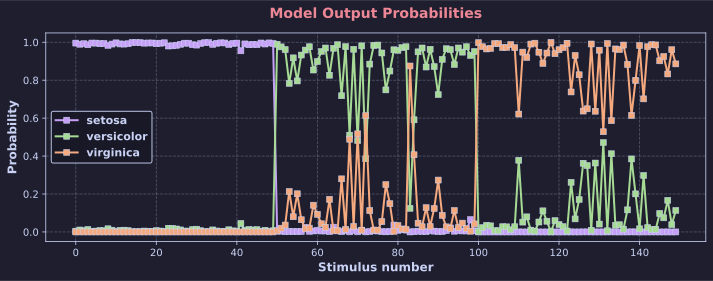

In [27]:
# plot the raw model outputs with Catppuccin Macchiato styling

plt.style.use("dark_background")
fig = plt.figure(figsize=(10, 4), facecolor="#1e1e2e")
fig.patch.set_facecolor("#1e1e2e")

# Plot with custom colors for each species
species_colors = ["#C6A0F6", "#a6da95", "#f5a97f"]  # setosa, versicolor, virginica
softmax_outputs = sm(predictions.detach())

for i, (species, color) in enumerate(
    zip(["setosa", "versicolor", "virginica"], species_colors)
):
    plt.plot(
        softmax_outputs[:, i],
        "s-",
        color=color,
        markerfacecolor=color,
        markeredgecolor="#cad3f5",
        markeredgewidth=0.5,
        linewidth=2,
        markersize=6,
        label=species,
    )

plt.xlabel("Stimulus number", fontsize=12, color="#cad3f5", fontweight="bold")
plt.ylabel("Probability", fontsize=12, color="#cad3f5", fontweight="bold")
plt.title(
    "Model Output Probabilities",
    fontsize=14,
    color="#ed8796",
    fontweight="bold",
    pad=15,
)
plt.grid(True, alpha=0.3, color="#cad3f5", linestyle="--")
plt.gca().set_facecolor("#1e1e2e")
plt.gca().tick_params(colors="#cad3f5", labelsize=10)

# Style legend
legend = plt.legend(
    fontsize=11, framealpha=0.9, facecolor="#181825", edgecolor="#cad3f5"
)
for text in legend.get_texts():
    text.set_color("#cad3f5")
    text.set_fontweight("bold")

# Style spines
for spine in plt.gca().spines.values():
    spine.set_color("#cad3f5")

plt.tight_layout()
plt.show()

# try it again without the softmax!

In [28]:
# 1) When the loss does not reach an asymptote, it's a good idea to train the model for more epochs. Increase the number of
#    epochs until the plot of the losses seems to hit a "floor" (that's a statistical term for being as small as possible).

# 2) We used a model with 64 hidden units. Modify the code to have 16 hidden units. How does this model perform? If there
#    is a decrease in accuracy, is that decrease distributed across all three iris types, or does the model learn some
#    iris types and not others?

# 3) Write code to compute three accuracy scores, one for each iris type. In real DL projects, category-specific accuracies
#    are often more informative than the aggregated accuracy.